In [55]:
from utils.Auger.SD.Monitoring import Monit
from scipy.optimize import curve_fit
from utils.binaries import *
from utils import CONSTANTS
import os

def parabola(x, scale, mip, y0):
    return scale * (x-mip)**2 + y0

def make_histo_fit(counts, p, t=None, version=None):
     
    # see Framework/SDetector/Station.h
    match p:
        case 0 | 1 | 2:
            ADC_bin_edges = np.array([4*k for k in range(100)] + [400 + 16*k for k in range(51)])
        case 3:
            ADC_bin_edges = np.array([2*k for k in range(100)] + [200 + 8*k for k in range(51)])
    ADC = 0.5 * (ADC_bin_edges[1:] + ADC_bin_edges[:-1])

    skip = 5
    _peak = np.argmax(counts[skip:100]) + skip
    _dip = np.argmax(np.diff(counts)) + 3
    start, stop = _dip + int(0.5 * (_peak - _dip)), _peak + int(0.5*(_peak - _dip))

    try:
        (curve, mip, height), pcov = curve_fit(parabola, ADC[start:stop], counts[start:stop],
                                        bounds=([-np.inf, 0, 0],[0, np.inf, np.inf]),
                                        maxfev=10000,
                                        p0=[-1, ADC[_peak], counts[_peak]])
        if t is not None:
            fig = plt.figure()
            plt.plot(ADC, counts)
            plt.plot(ADC[start:stop], parabola(ADC[start:stop], curve, mip, height))
            plot.save(fig, f'DaqIntegrationTest/{version}/pmt{int(p)}/{t}.png')
            plt.close(fig)

        (_, mip, _) = uncertainties.correlated_values([curve, mip, height], pcov)
        if mip.std_dev / mip.n > 0.1: raise ValueError
        if mip.n > 300: raise ValueError

    except: 
        return np.nan, np.nan

    return mip.n, mip.std_dev


version = 'v24'
base = f'/cr/data01/filip/Data/daqIntegrationTests/{version}/'
monit_files = [base + file for file in os.listdir(base) if 'mc' in file]

# monit = Monit(*monit_files)
# t, wcd = monit('fTime', 136), monit('fPeak', 136).T
# vem = np.array([np.mean(w) for w in wcd] + [50])

data = np.loadtxt(f'/cr/data01/filip/Data/daqIntegrationTests/{version}/out.txt')
data = data[:, 2:]

# t_acq = np.loadtxt(f'/cr/data01/filip/Data/daqIntegrationTests/{version}/calib.test', usecols=[0])
# t_acq = t_acq[np.where(~np.isnan(t_acq))[0]]
# data[:, 0] += CONSTANTS.GPS_OFFSET


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


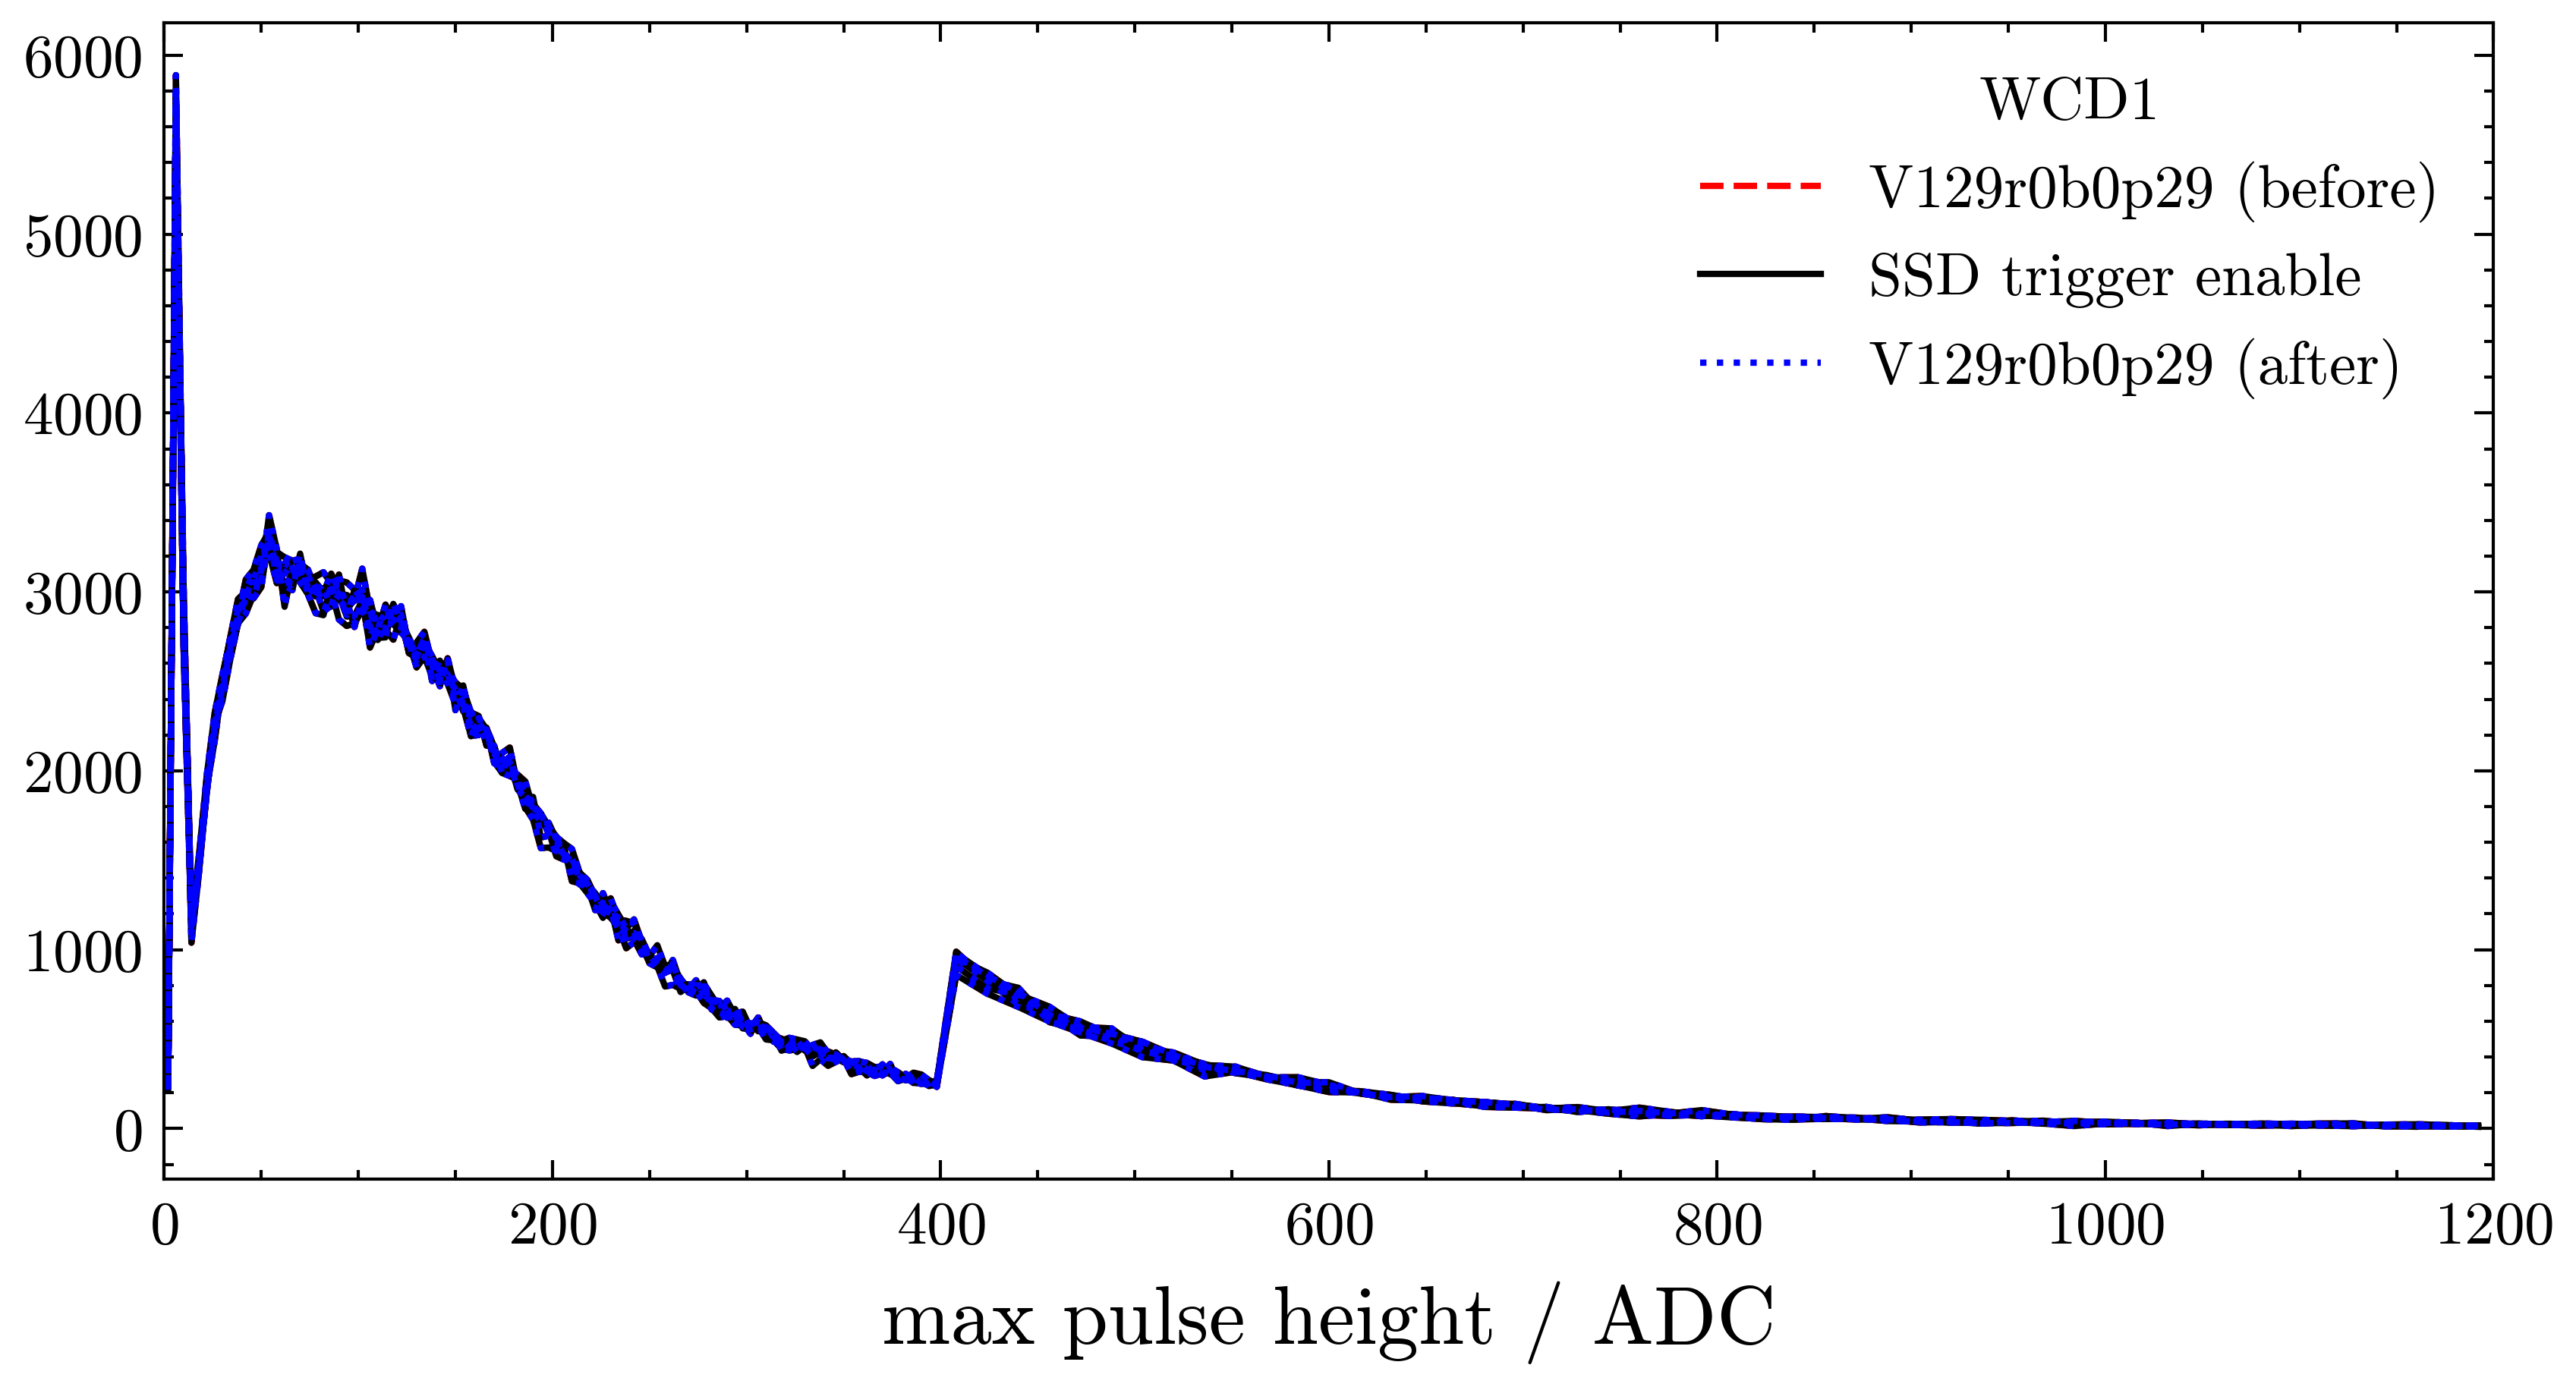

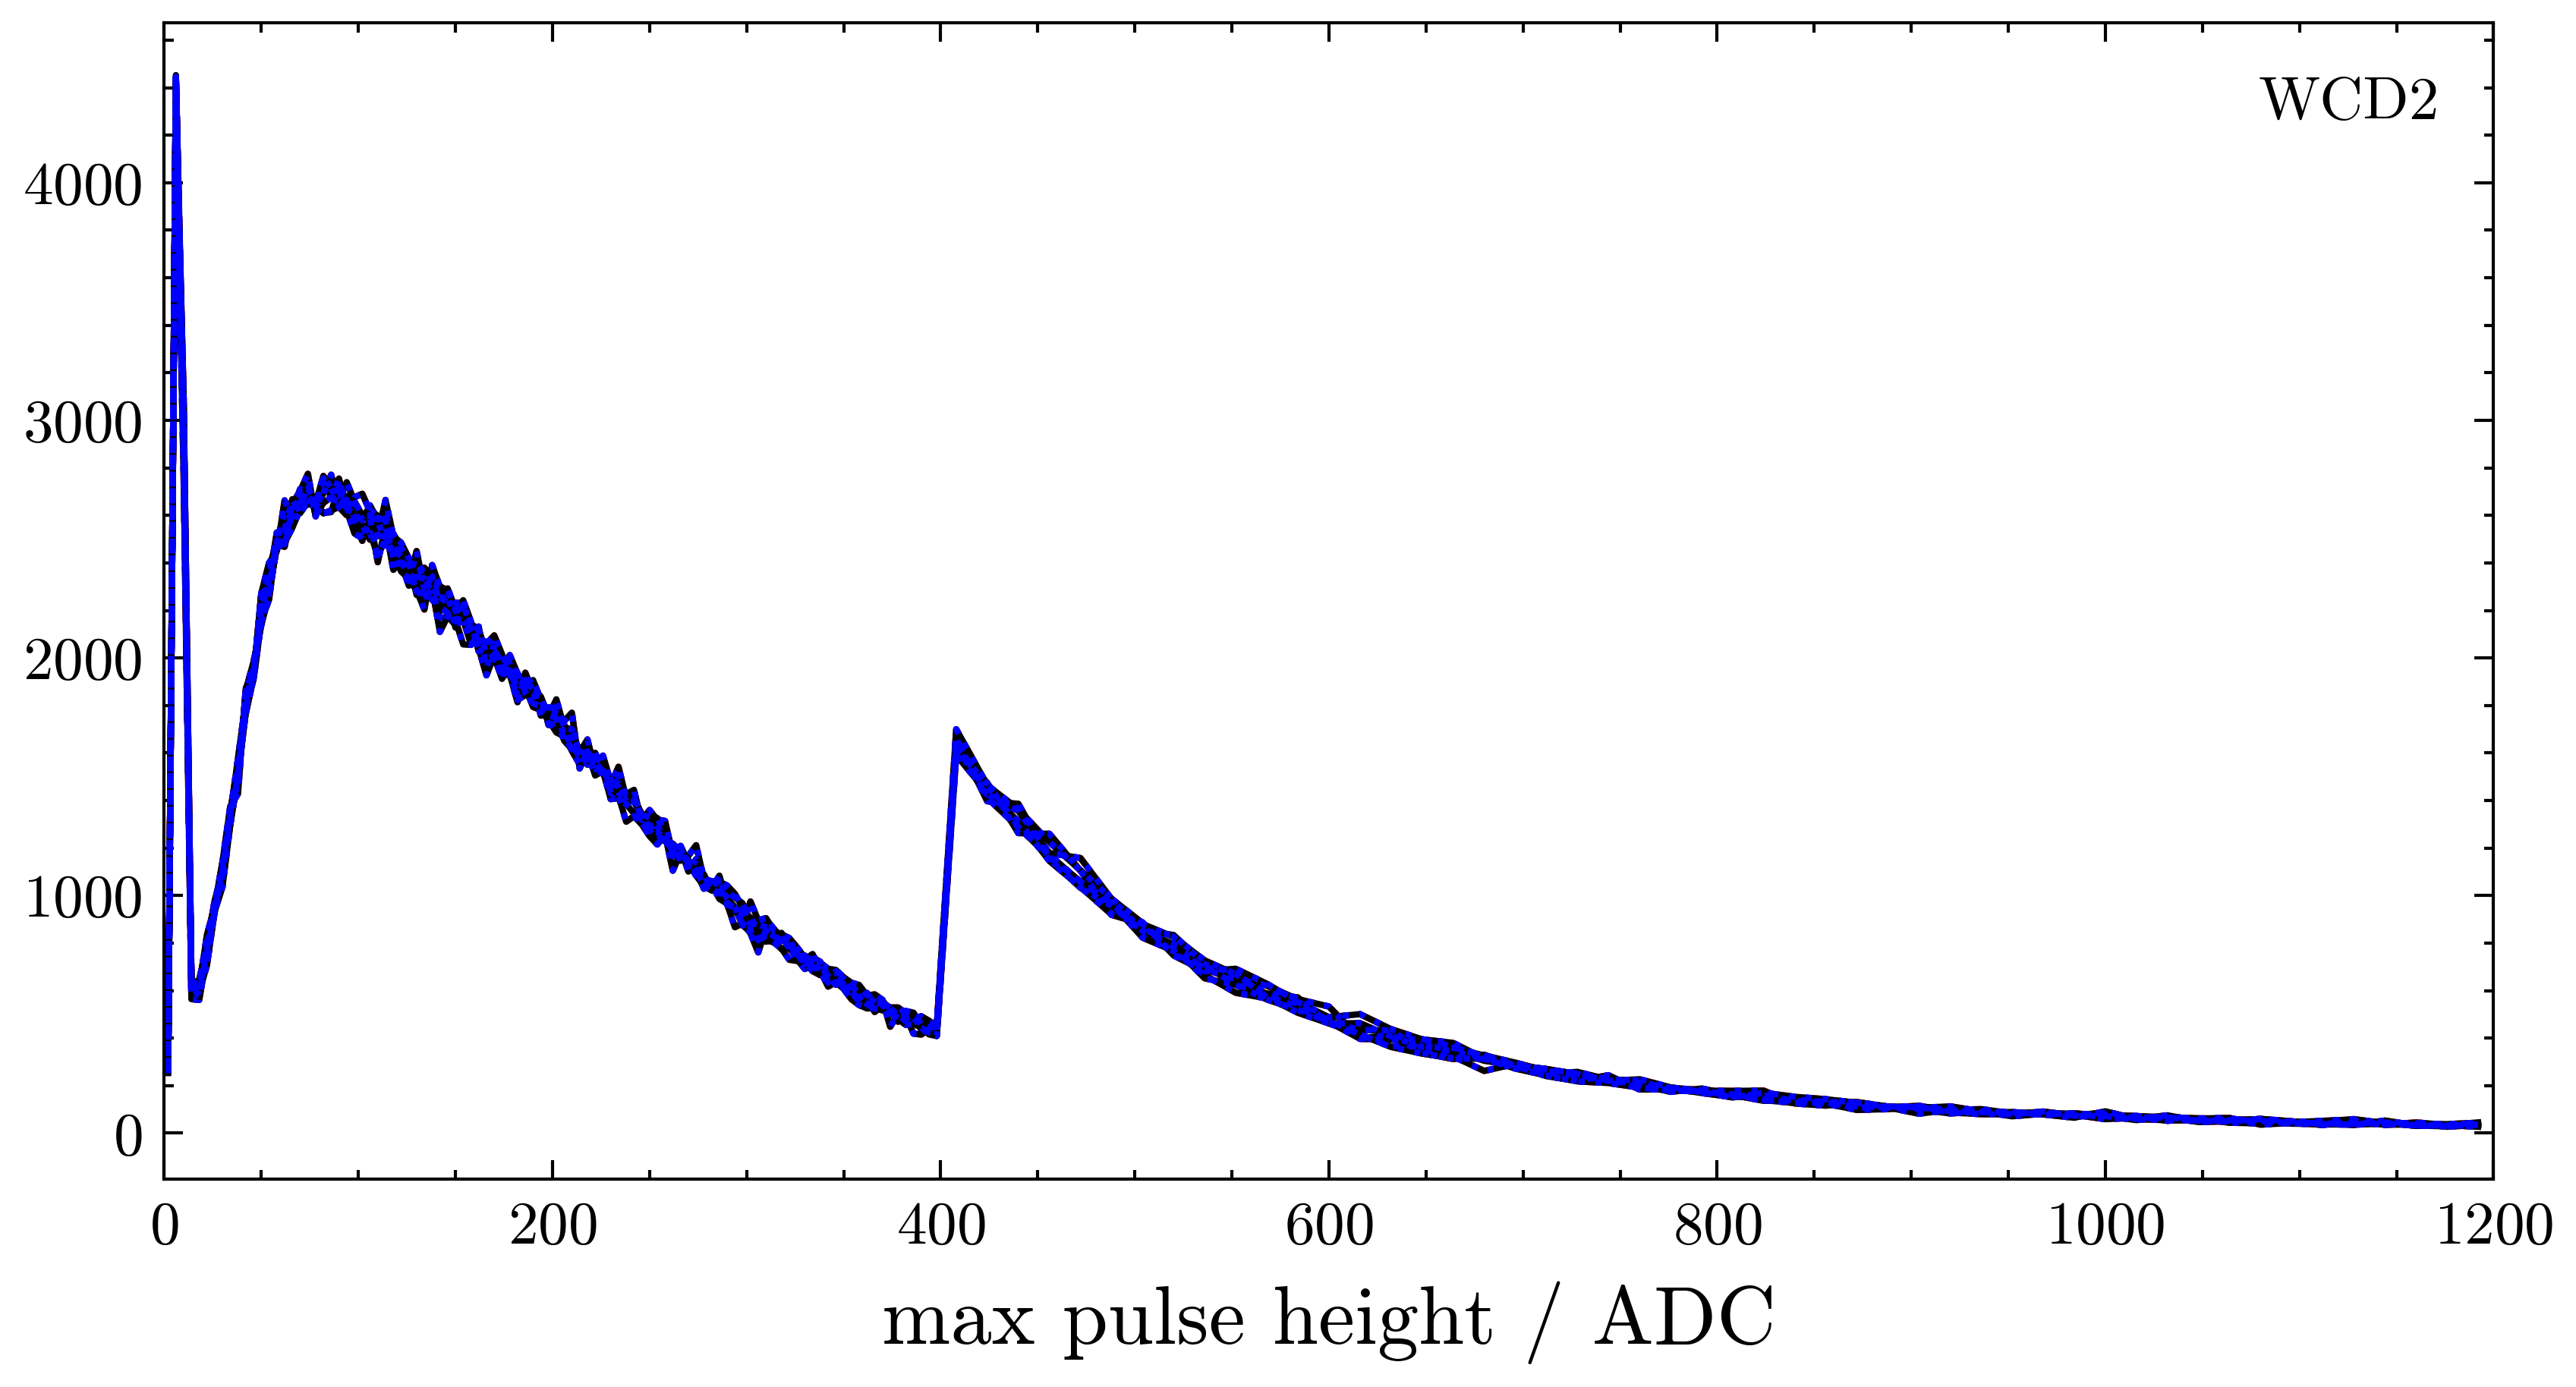

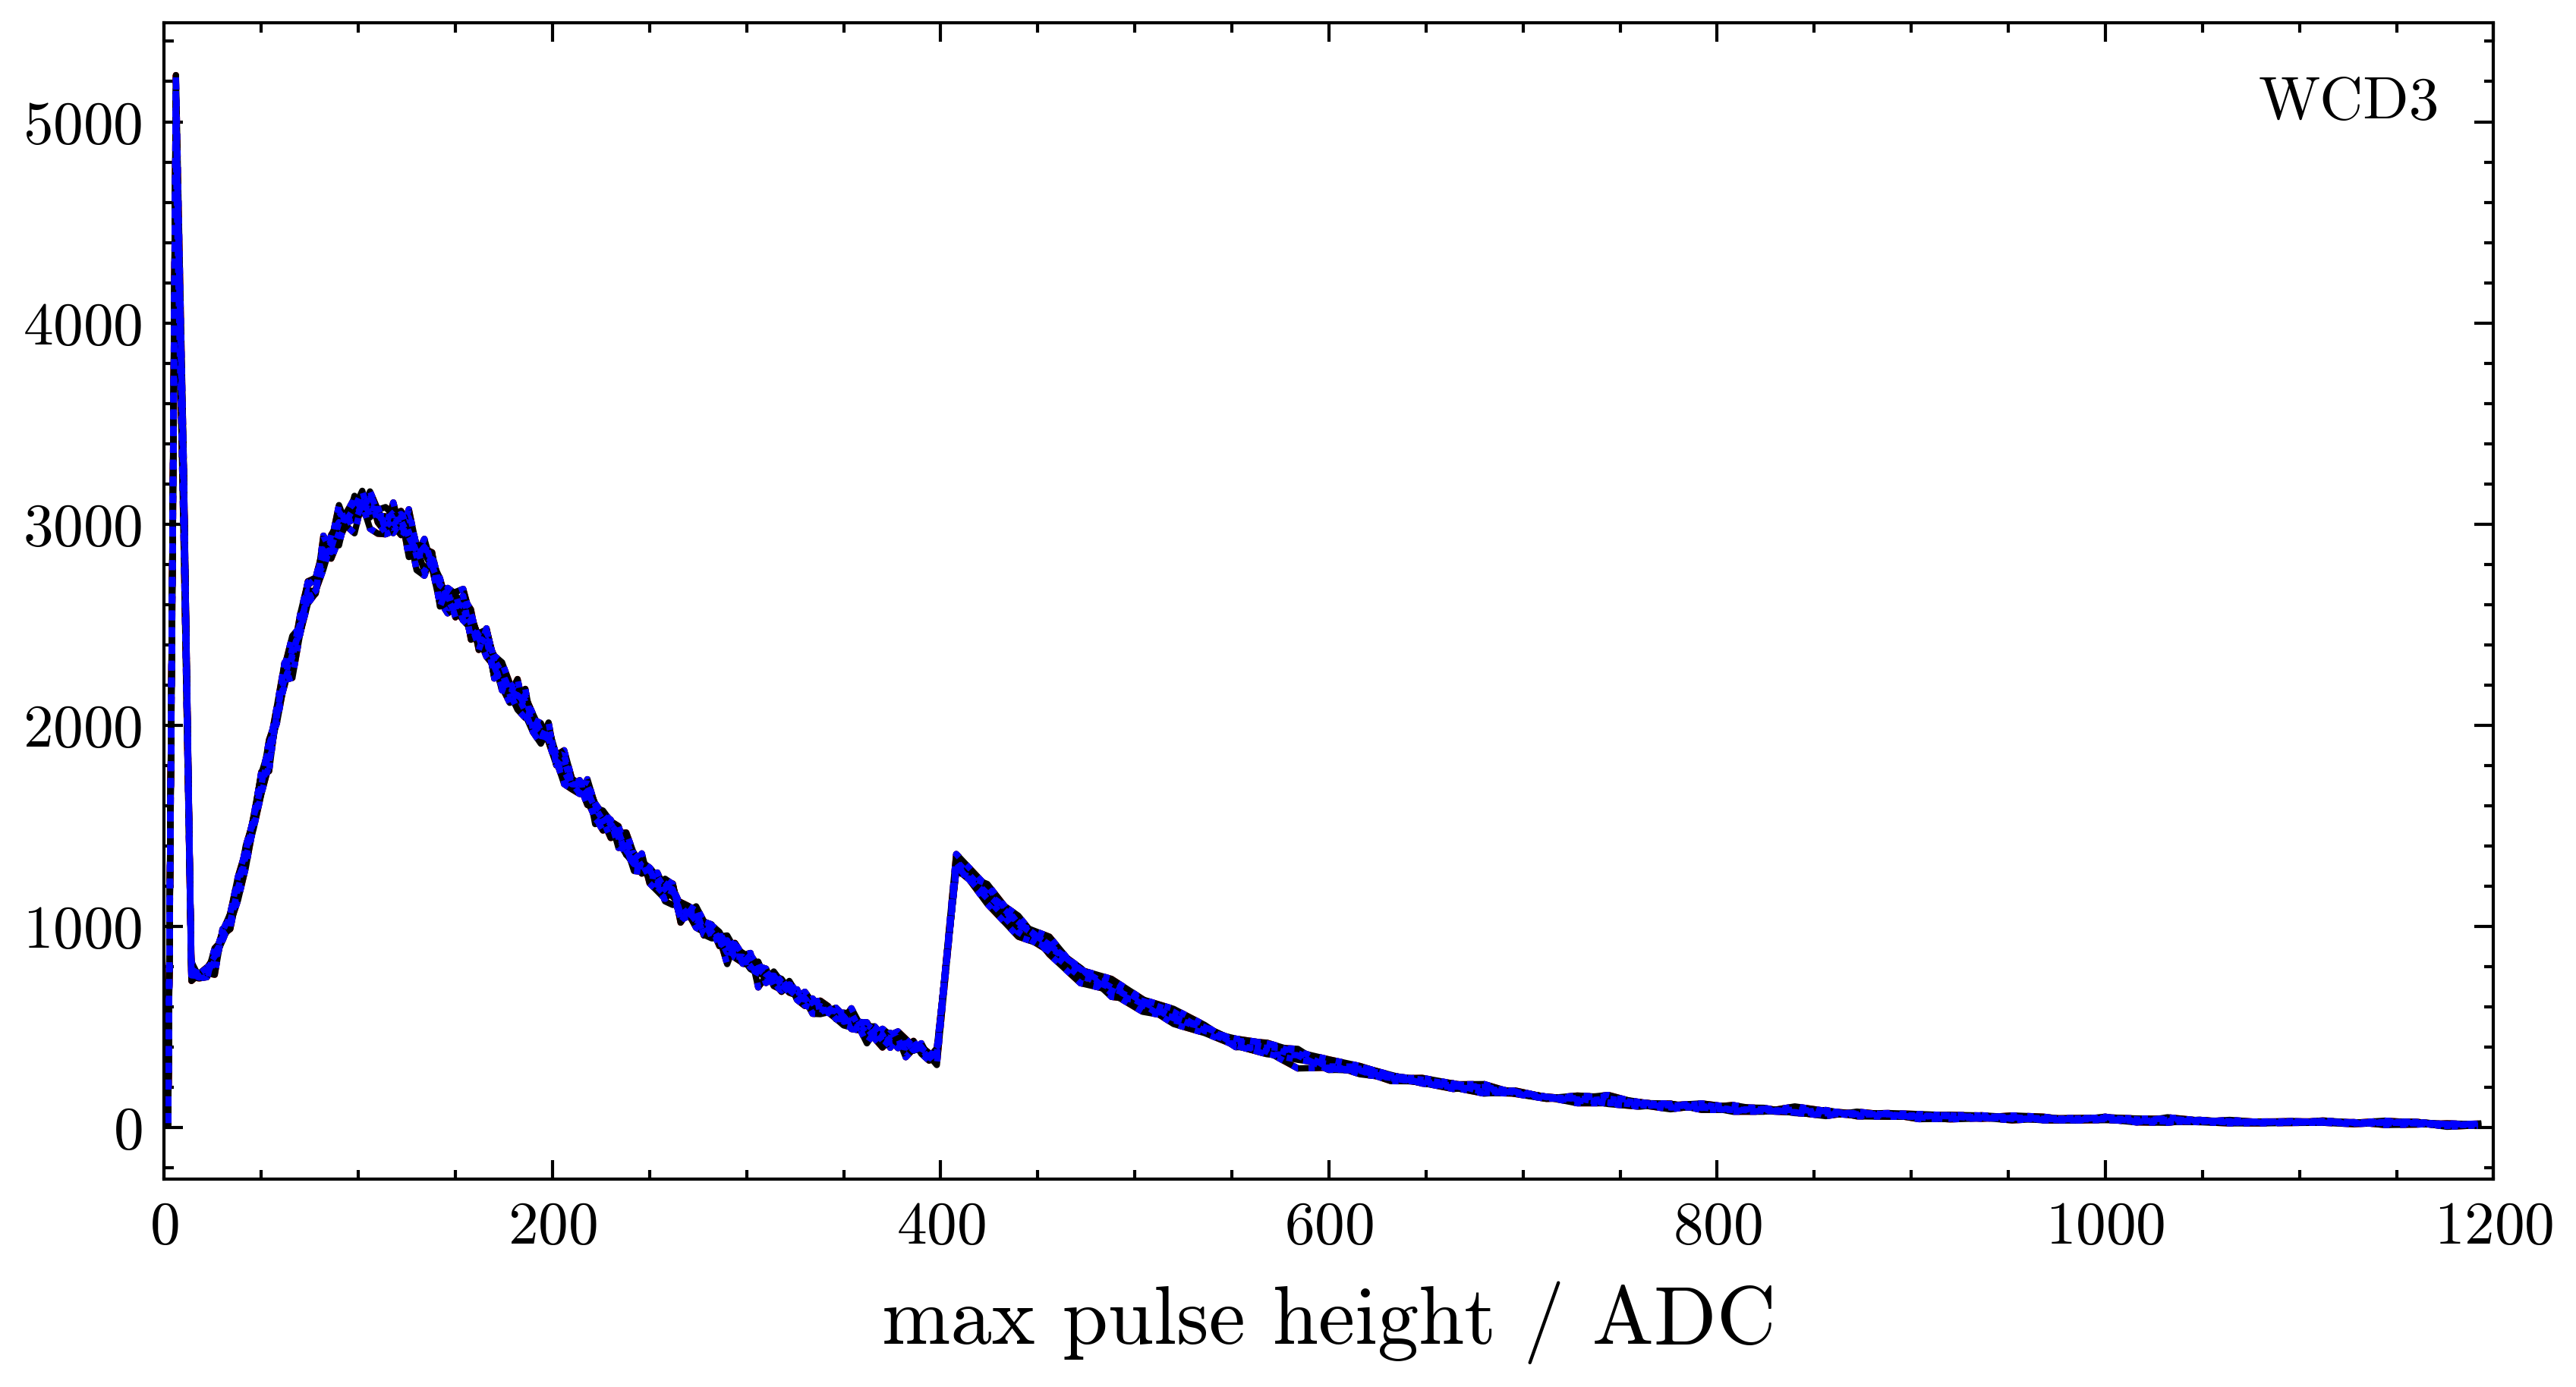

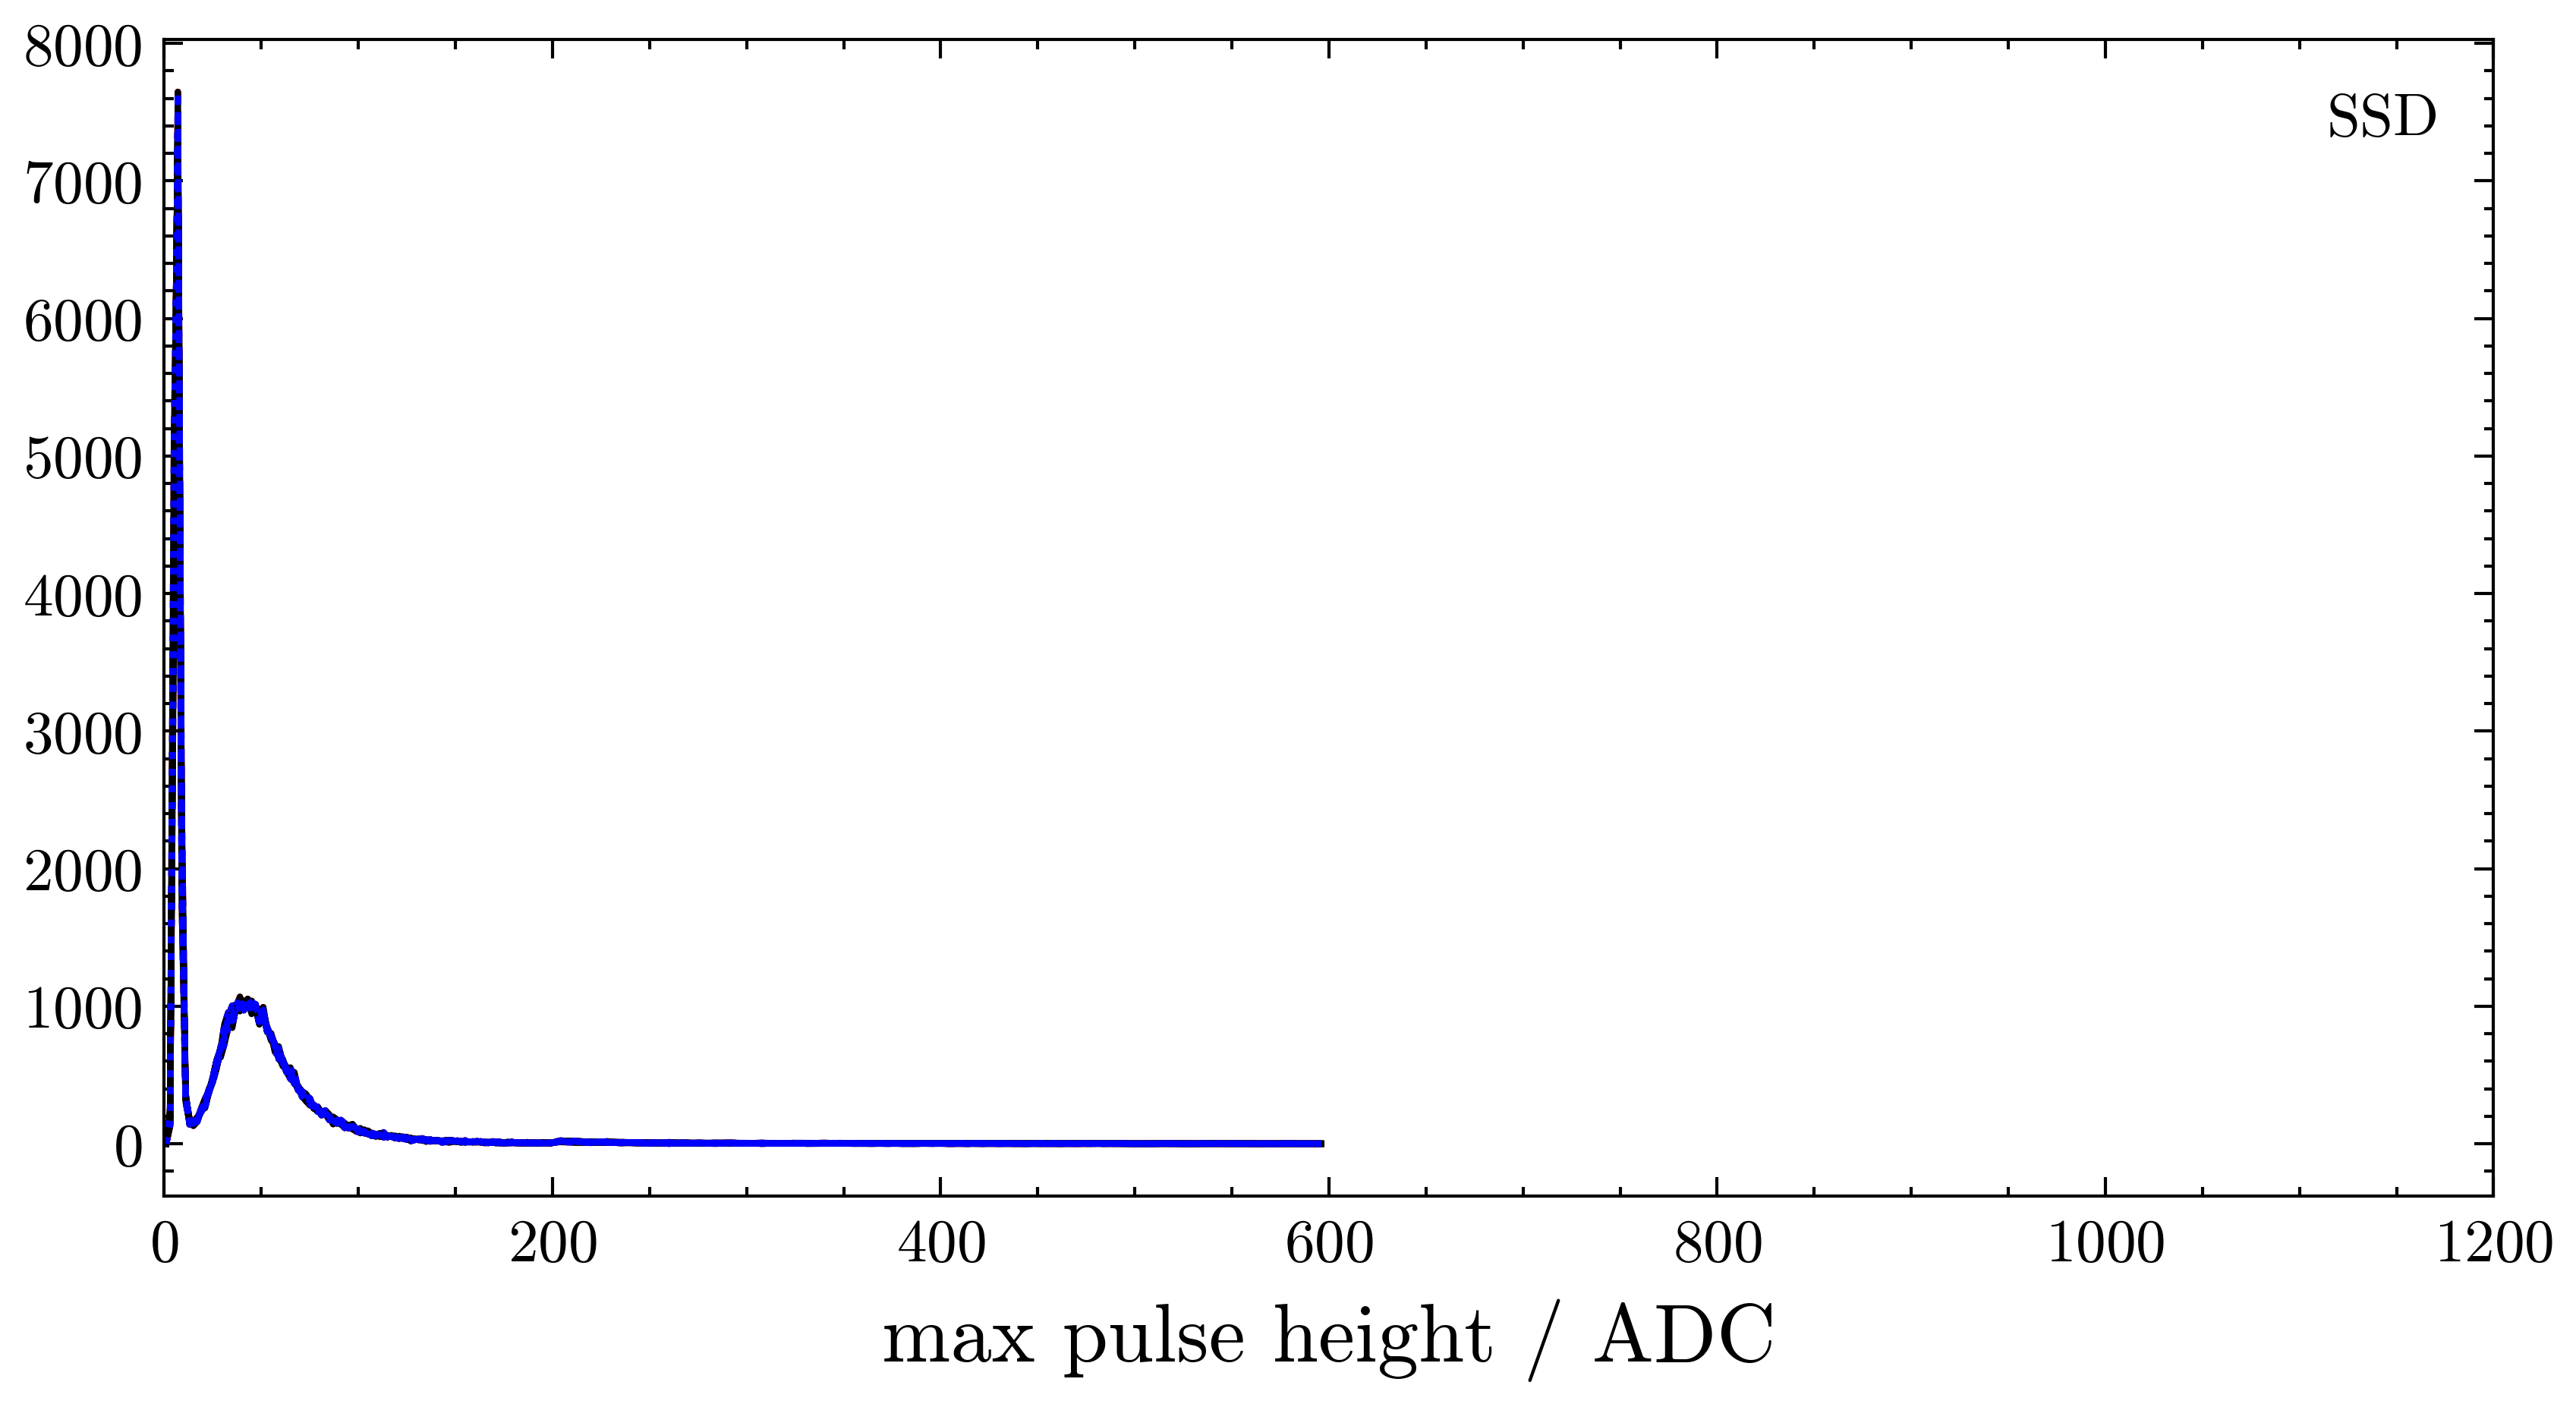

In [62]:
from utils.plotting import *

# start, stop = np.min(t_acq), np.max(t_acq)
start, stop = 1411725280 + CONSTANTS.GPS_OFFSET, 1411731736 + CONSTANTS.GPS_OFFSET

mask_ref1 = np.where(data[:, 0] < start)[0]
mask_acq = np.where(np.logical_and(data[:, 0] > start, data[:, 0] < stop))[0]
mask_ref2 = np.where(data[:, 0] > stop)[0]

axes = [plt.subplots()[1] for _ in range(4)]
titles = ['V129r0b0p29 (before)', 'SSD trigger enable', 'V129r0b0p29 (after)']

for title, color, ls, mask in zip(titles, ['r', 'k', 'b'], ['--', 'solid', ':'], [mask_ref1, mask_acq, mask_ref2]):
    firsttime = True
        
    for histo in data[mask_ref1]:
        t, pmt, *histo = histo
        bins = CONSTANTS.UUB_SSD_BIN_CENTERS if pmt == 3 else CONSTANTS.UUB_WCD_BIN_CENTERS

        if firsttime:
            axes[int(pmt)].plot(bins, histo, c=color, ls=ls, label=title)
        else:
            axes[int(pmt)].plot(bins, histo, c=color, ls=ls)

        firsttime = False

title = ['WCD1', 'WCD2', 'WCD3', 'SSD']
for i in range(4):
    axes[i].legend(title=title[i])
    axes[i].set_xlabel("max pulse height / ADC")
    axes[i].axvline(start, c='k', ls='--', lw=0.8)
    axes[i].axvline(stop, c='k', ls='--', lw=0.8)
    axes[i].set_xlim(0, 1200)


In [51]:
print(pmt)

11.0


In [48]:
print(t)

136.0


In [54]:
print(data[:, 2:])

[[1.72768688e+09 0.00000000e+00 2.55000000e+02 ... 1.60000000e+01
  1.10000000e+01 1.60000000e+01]
 [1.72768688e+09 1.00000000e+00 2.78000000e+02 ... 4.50000000e+01
  3.50000000e+01 3.30000000e+01]
 [1.72768688e+09 2.00000000e+00 2.10000000e+01 ... 2.40000000e+01
  3.00000000e+00 1.00000000e+01]
 ...
 [1.72769590e+09 1.00000000e+00 2.66000000e+02 ... 3.70000000e+01
  3.50000000e+01 4.20000000e+01]
 [1.72769590e+09 2.00000000e+00 3.40000000e+01 ... 2.10000000e+01
  1.80000000e+01 1.70000000e+01]
 [1.72769590e+09 3.00000000e+00 0.00000000e+00 ... 6.00000000e+00
  1.00000000e+00 4.00000000e+00]]


In [57]:
print(mask)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


In [58]:
print(len(mask))

84


In [60]:
print(data[:, 0])

[1.72768688e+09 1.72768688e+09 1.72768688e+09 1.72768688e+09
 1.72768727e+09 1.72768727e+09 1.72768727e+09 1.72768727e+09
 1.72768775e+09 1.72768775e+09 1.72768775e+09 1.72768775e+09
 1.72768824e+09 1.72768824e+09 1.72768824e+09 1.72768824e+09
 1.72768861e+09 1.72768861e+09 1.72768861e+09 1.72768861e+09
 1.72768873e+09 1.72768873e+09 1.72768873e+09 1.72768873e+09
 1.72768922e+09 1.72768922e+09 1.72768922e+09 1.72768922e+09
 1.72769053e+09 1.72769053e+09 1.72769053e+09 1.72769053e+09
 1.72769076e+09 1.72769076e+09 1.72769076e+09 1.72769076e+09
 1.72769127e+09 1.72769127e+09 1.72769127e+09 1.72769127e+09
 1.72769176e+09 1.72769176e+09 1.72769176e+09 1.72769176e+09
 1.72769224e+09 1.72769224e+09 1.72769224e+09 1.72769224e+09
 1.72769231e+09 1.72769231e+09 1.72769231e+09 1.72769231e+09
 1.72769273e+09 1.72769273e+09 1.72769273e+09 1.72769273e+09
 1.72769322e+09 1.72769322e+09 1.72769322e+09 1.72769322e+09
 1.72769371e+09 1.72769371e+09 1.72769371e+09 1.72769371e+09
 1.72769408e+09 1.727694

In [63]:
stop

1727696536

In [ ]:

print(CONSTANTS.GPS_OFFSET)